In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
# Configs
member = 'weibull'
alpha=1.0
l1=1.02
l2=2.61
l3=1.59
l4=0

# helper functions
def G(t, lam):
    if member == 'weibull':
        return 1 - np.exp(-t ** lam)
    elif member == 'gompertz':
        return 1 - np.exp(-(np.exp(t * lam) - 1))
    else:
        return (t * lam / (1 + t * lam))
        
def R(t, lam1, lam2):
    if lam2 == 0:
        return (1 - G(t, lam1))
    return (1 - G(t, lam2)) * (1 - G(t, lam2))

def g_dash(t, lam):
    if member == 'weibull':
        return lam * (t ** (lam - 1)) * np.exp(-t ** lam)
    elif member == 'gompertz':
        return lam * np.exp(1 + lam * t - np.exp(lam * t))
    else: 
        return lam / (1 + t * lam) ** 2
    
def r_dash(t, lam1, lam2):
    g1 = G(t, lam1)
    g1_d = g_dash(t, lam1)
    if (lam2 == 0):
        return -g1_d
    
    g2 = G(t, lam2)
    g2_d = g_dash(t, lam2)
    return (g1 * g2_d + g2* g1_d - g1_d - g2_d)

def pdf(x, y):
    c1 = x - y
    a=(alpha**2) * (r_dash(x, l1, l4)* r_dash(y, l2, l3)) * (R(x, l1, l4)* R(y, l2, l3))**(alpha - 1)
    b=(alpha**2) * (r_dash(x, l1, l3)* r_dash(y, l2, l4)) * (R(x, l1, l3)* R(y, l2, l4))**(alpha - 1)
    return  np.where(c1 < 0, a, b)

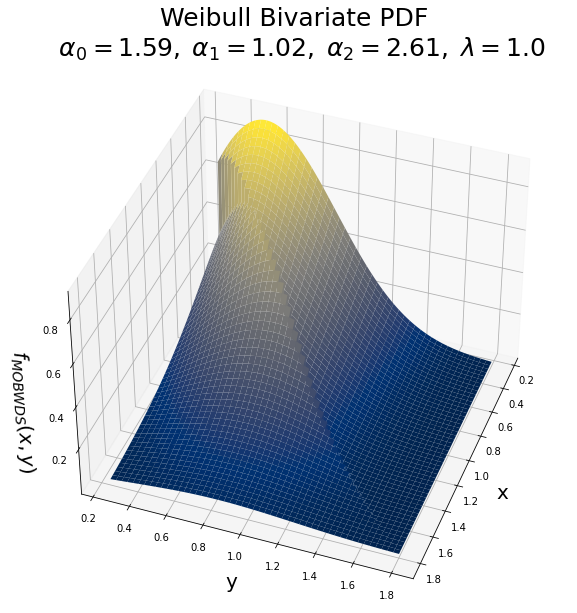

In [35]:
# data visualizations
x = np.linspace(0.25, 1.8, 1000)
y = np.linspace(0.25, 1.8, 1000)
X, Y = np.meshgrid(x,y)
Z = pdf(X,Y)

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.get_cmap('cividis'))
ax.set_xlabel('x', fontsize=20, labelpad=10)
ax.set_ylabel('y', fontsize=20, labelpad=10)
ax.set_zlabel(r'$f_{MOBWDS}(x, y)$', rotation=0, fontsize=20, labelpad=10)

info = rf'$\alpha_0 = {l3},\; \alpha_1 = {l1},\; \alpha_2 = {l2},\; \lambda = {alpha}$' 
ax.set_title(f'Weibull Bivariate PDF \n {info}', fontsize=25)
ax.view_init(40, 20)
plt.savefig(f"{member}.jpg")